In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib



In [3]:
import os
print(os.getcwd())

c:\Users\user\Desktop\intelligent system\notebooks


In [4]:
# Load dataset
df = pd.read_csv(r'C:\Users\user\Desktop\intelligent system\data\train.csv')

In [5]:
# See the first few rows
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [6]:
# Check summary statistics
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:
# Check data info (types and missing values)
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
# Count how many survived vs not
print(df['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


In [9]:
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
# Age has missing values, fill with median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [11]:
# Cabin has many missing values, drop this column
df.drop(columns=['Cabin'], inplace=True)

In [12]:
# Embarked has a few missing values, fill with the most common port (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

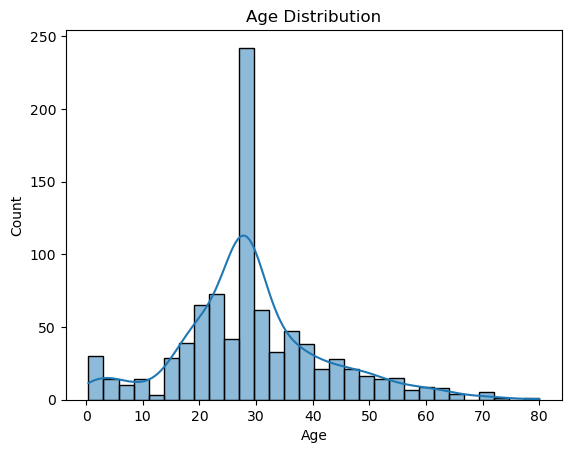

In [13]:
# Distribution of Age
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

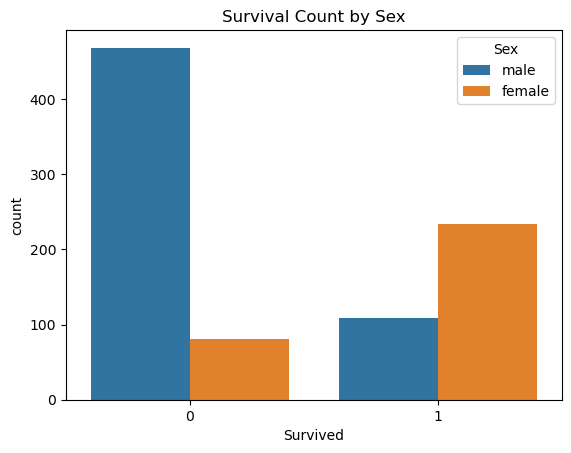

In [14]:
# Countplot of Survived by Sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Sex')
plt.show()

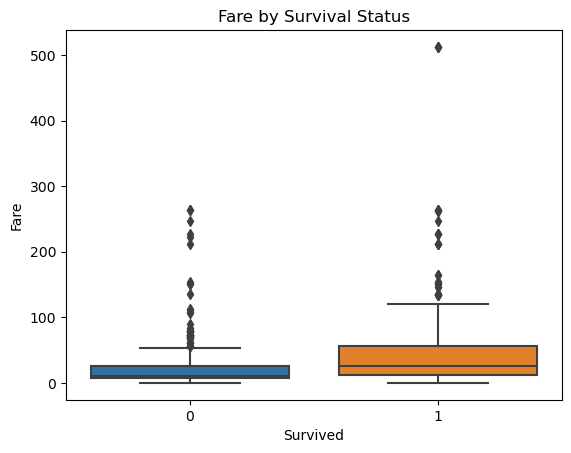

In [15]:
# Boxplot of Fare by Survival
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title('Fare by Survival Status')
plt.show()

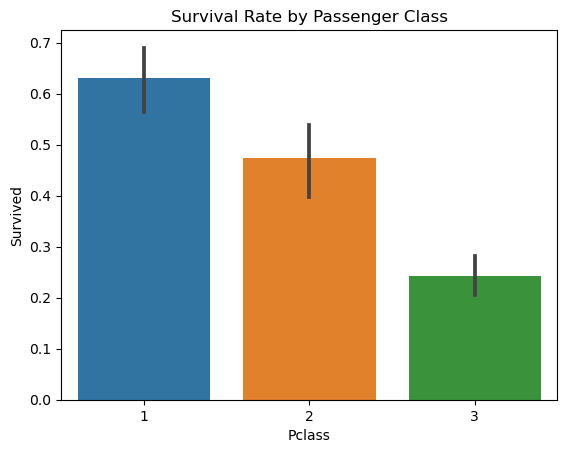

In [16]:
# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

In [17]:
# Convert Sex into numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [18]:
# Convert Embarked into dummy variables
embarked_dummies = pd.get_dummies(df['Embarked'], drop_first=True)
df = pd.concat([df, embarked_dummies], axis=1)

In [19]:
# Create a new feature: FamilySize = SibSp + Parch + 1 (self)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [20]:
# Drop columns not useful for model
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Embarked'], inplace=True)

In [21]:
# Target variable
y = df['Survived']

# Features (all except Survived)
X = df.drop('Survived', axis=1)

# Split dataset: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [22]:
model_lr = LogisticRegression(max_iter=200, random_state=42)
model_rf = RandomForestClassifier(random_state=42)


In [23]:
# Logistic Regression cross-validation accuracy
scores_lr = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='accuracy')
print(f'Logistic Regression CV Accuracy: {scores_lr.mean():.4f}')

# Random Forest cross-validation accuracy
scores_rf = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='accuracy')
print(f'Random Forest CV Accuracy: {scores_rf.mean():.4f}')


c:\ProgramData\anaconda3\envs\Sarada\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\ProgramData\anaconda3\envs\Sarada\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

Logistic Regression CV Accuracy: 0.7907
Random Forest CV Accuracy: 0.7894


In [24]:
# Train Logistic Regression
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# Train Random Forest
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Evaluate
def evaluate_model(y_true, y_pred, model_name):
    print(f'---{model_name} Performance on Test Set---')
    print(f'Accuracy: {accuracy_score(y_true, y_pred):.4f}')
    print(f'Precision: {precision_score(y_true, y_pred):.4f}')
    print(f'Recall: {recall_score(y_true, y_pred):.4f}')
    print(f'F1 Score: {f1_score(y_true, y_pred):.4f}')
    print('')

evaluate_model(y_test, y_pred_lr, 'Logistic Regression')
evaluate_model(y_test, y_pred_rf, 'Random Forest')


c:\ProgramData\anaconda3\envs\Sarada\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


---Logistic Regression Performance on Test Set---
Accuracy: 0.8101
Precision: 0.7857
Recall: 0.7432
F1 Score: 0.7639

---Random Forest Performance on Test Set---
Accuracy: 0.8212
Precision: 0.8000
Recall: 0.7568
F1 Score: 0.7778



In [25]:
# Suppose Random Forest is best
joblib.dump(model_rf, 'model.pkl')
print("Model saved successfully!")


Model saved successfully!


In [26]:
loaded_model = joblib.load('model.pkl')
# Use loaded_model.predict(new_data) to predict


In [27]:
files.download('model.pkl')

NameError: name 'files' is not defined